# Esercizio 11.2

Per prima cosa do un'occhiata all'andamento della funzione


In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [3]:
np.random.seed(0)
a=4
b=3
c=2
d=3


x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
x_train.sort()
y_target = a - b*x_valid - c*x_valid*x_valid + d*x_valid**3
sigma = 0.5 
y_valid = np.random.normal(a - b*x_valid - c*x_valid*x_valid + d*x_valid**3, sigma)
y_train = np.random.normal(a - b*x_train - c*x_train*x_train + d*x_train**3, sigma)
    

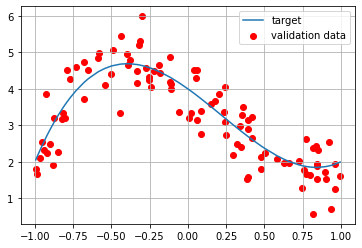

In [4]:
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

Provo a costruire una prima rete neurale molto semplice con solo 3 strati di neuroni densi, con il primi 2 aventi 64 neuroni e l'ultimo 1 solo. Come funzione di attivazione ho provato la tangente iperbolica per i primi due strati, mentre per l'ultimo strato ho utilizzato un funzione lineare

In [24]:
model1 = tf.keras.Sequential()
model1.add(Dense(128, input_shape=(1,),activation="relu" ))
model1.add(Dense(64, input_shape=(1,),activation="relu" ))
model1.add(Dense(1, activation="linear" ))
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               256       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 8,577
Trainable params: 8,577
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model1.fit(x=x_train, y=y_train,
          batch_size=30, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/100
17/17 [==============================] - 1s 12ms/step - loss: 7.3941 - mse: 7.3941 - val_loss: 2.3932 - val_mse: 2.3932
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 1.2293 - mse: 1.2293 - val_loss: 1.0900 - val_mse: 1.0900
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.7517 - mse: 0.7517 - val_loss: 0.9990 - val_mse: 0.9990
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6802 - mse: 0.6802 - val_loss: 0.9190 - val_mse: 0.9190
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6278 - mse: 0.6278 - val_loss: 0.8672 - val_mse: 0.8672
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5954 - mse: 0.5954 - val_loss: 0.8454 - val_mse: 0.8454
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.5725 - mse: 0.5725 - val_loss: 0.7870 - val_mse: 0.7870
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5382 - 

In [26]:
score = model1.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

4/4 [==============================] - 0s 2ms/step - loss: 0.3304 - mse: 0.3304

Validation loss: 0.3303903341293335
Validation accuracy: 0.3303903341293335


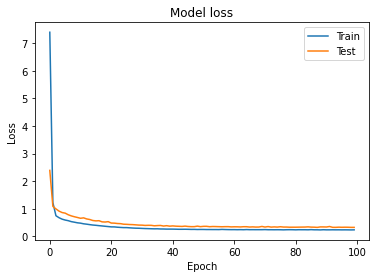

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

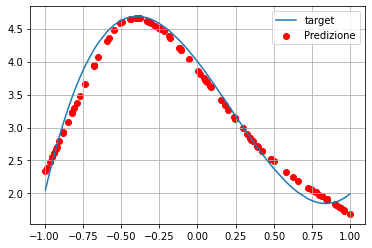

In [28]:
y_predicted1=model1.predict(x_valid)

plt.scatter(x_valid,y_predicted1 ,color='r', label="Predizione")
plt.plot(x_valid, y_target, label='target')
#plt.plot(x_valid_rev, y_target_valid, label="True")
plt.legend()
plt.grid(True)
plt.show()

Pur avendo dei buoni score per quanto riguarda la loss e la val_loss la rete neurale non riesce ancora a fittare in maniera adeguata la funzione scelta.

## Ottimizzatori

Per miglioare il fit provo a cambiare ottimizzatore sulla medesima rete neurale. Come ottimizzatore utilizzerò adam

In [29]:
model2 = tf.keras.Sequential()
model2.add(Dense(128, input_shape=(1,),activation="relu" ))
model2.add(Dense(64, input_shape=(1,),activation="relu" ))
model2.add(Dense(1, activation="linear" ))
model2.compile(optimizer='adam', loss='mse', metrics=['mse'])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 8,577
Trainable params: 8,577
Non-trainable params: 0
_________________________________________________________________


In [30]:
history2 = model2.fit(x=x_train, y=y_train,
          batch_size=30, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/100
17/17 [==============================] - 1s 22ms/step - loss: 11.1524 - mse: 11.1524 - val_loss: 9.1251 - val_mse: 9.1251
Epoch 2/100
17/17 [==============================] - 0s 7ms/step - loss: 8.2019 - mse: 8.2019 - val_loss: 5.9756 - val_mse: 5.9756
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 4.5775 - mse: 4.5775 - val_loss: 2.9907 - val_mse: 2.9907
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 2.0620 - mse: 2.0620 - val_loss: 2.1941 - val_mse: 2.1941
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 1.5548 - mse: 1.5548 - val_loss: 1.8058 - val_mse: 1.8058
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 1.2396 - mse: 1.2396 - val_loss: 1.4955 - val_mse: 1.4955
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 1.0688 - mse: 1.0688 - val_loss: 1.3575 - val_mse: 1.3575
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.9559 

In [31]:
score = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

4/4 [==============================] - 0s 4ms/step - loss: 0.3293 - mse: 0.3293

Validation loss: 0.3292604386806488
Validation accuracy: 0.3292604386806488


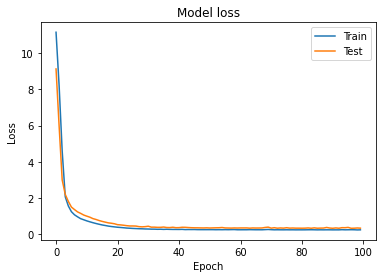

In [32]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

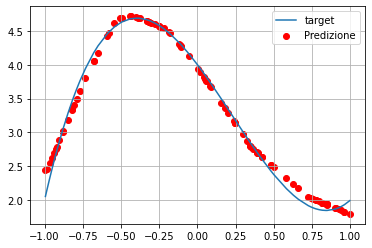

In [33]:
y_predicted2=model2.predict(x_valid)

plt.scatter(x_valid,y_predicted2 ,color='r', label="Predizione")
plt.plot(x_valid, y_target, label='target')
#plt.plot(x_valid_rev, y_target_valid, label="True")
plt.legend()
plt.grid(True)
plt.show()

Cambiando l'ottimizzatore otteniamo score peggiori per quanto riguarda sia la loss che la val_loss. Il fit risulta però migliore rispetto a quando ho utilizzato "sgd" sopratutto nel fittare i primi dati.

# Funzioni di costo

L'ultimo test è quello sulla funzione di costo. Fino ad ora avevo utilizzato "mean squared error" ora provo ad utilizzare "mean absolute error".

In [34]:
model3 = tf.keras.Sequential()
model3.add(Dense(128, input_shape=(1,),activation="relu" ))
model3.add(Dense(64, input_shape=(1,),activation="relu" ))
model3.add(Dense(1, activation="linear" ))
model3.compile(optimizer='adam', loss='mae', metrics=['mae'])
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 8,577
Trainable params: 8,577
Non-trainable params: 0
_________________________________________________________________


In [35]:
history3 = model3.fit(x=x_train, y=y_train,
          batch_size=30, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/100
17/17 [==============================] - 1s 32ms/step - loss: 3.0834 - mae: 3.0834 - val_loss: 2.6179 - val_mae: 2.6179
Epoch 2/100
17/17 [==============================] - 0s 9ms/step - loss: 2.4288 - mae: 2.4288 - val_loss: 1.8567 - val_mae: 1.8567
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 1.5478 - mae: 1.5478 - val_loss: 1.3271 - val_mae: 1.3271
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 1.1404 - mae: 1.1404 - val_loss: 1.1828 - val_mae: 1.1828
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.9321 - mae: 0.9321 - val_loss: 0.9861 - val_mae: 0.9861
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8095 - mae: 0.8095 - val_loss: 0.8911 - val_mae: 0.8911
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.7354 - mae: 0.7354 - val_loss: 0.8410 - val_mae: 0.8410
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6913 - 

In [36]:
score = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

4/4 [==============================] - 0s 2ms/step - loss: 0.3293 - mse: 0.3293

Validation loss: 0.3292604386806488
Validation accuracy: 0.3292604386806488


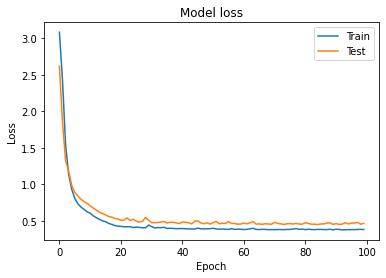

In [37]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

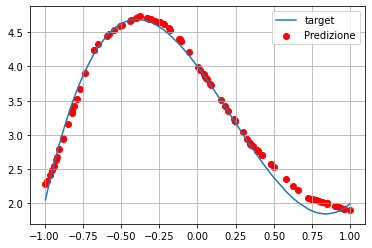

In [38]:
y_predicted3=model3.predict(x_valid)

plt.scatter(x_valid,y_predicted3 ,color='r', label="Predizione")
plt.plot(x_valid, y_target, label='target')
#plt.plot(x_valid_rev, y_target_valid, label="True")
plt.legend()
plt.grid(True)
plt.show()

Anche cambiando la funzione di costo non cambia il risultato del loss e del val_loss score.

Ora provo a fittare tutti i risultati per vedere il confronto tra le tre reti neurali

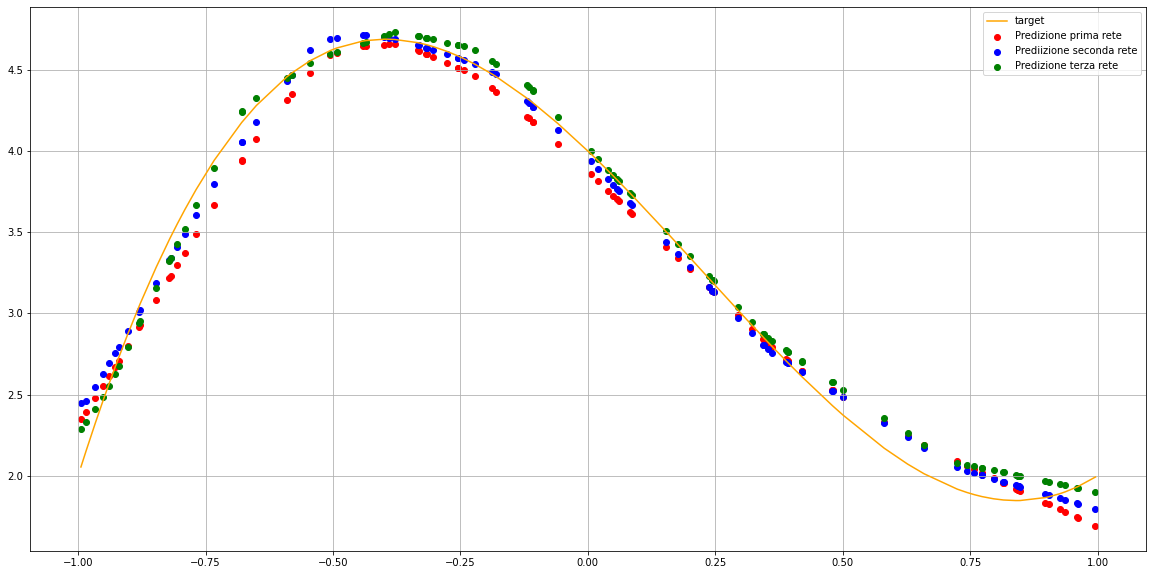

In [39]:
y_predicted=model3.predict(x_valid)

plt.figure(figsize=(20,10));

plt.scatter(x_valid,y_predicted1 ,color='r', label="Predizione prima rete")
plt.scatter(x_valid,y_predicted2 ,color='b', label="Prediizione seconda rete")
plt.scatter(x_valid,y_predicted3 ,color='g', label="Predizione terza rete")
plt.plot(x_valid, y_target, label='target',color="orange")

plt.legend()
plt.grid(True)
plt.show()

Ottimizzatore adam risulta il migliore per eserguire questo tipo fit. Non ci sono sostanziali differenze nell'utilizzo della funzione costo.

# Punti fuori dall'intervallo [-1,1]

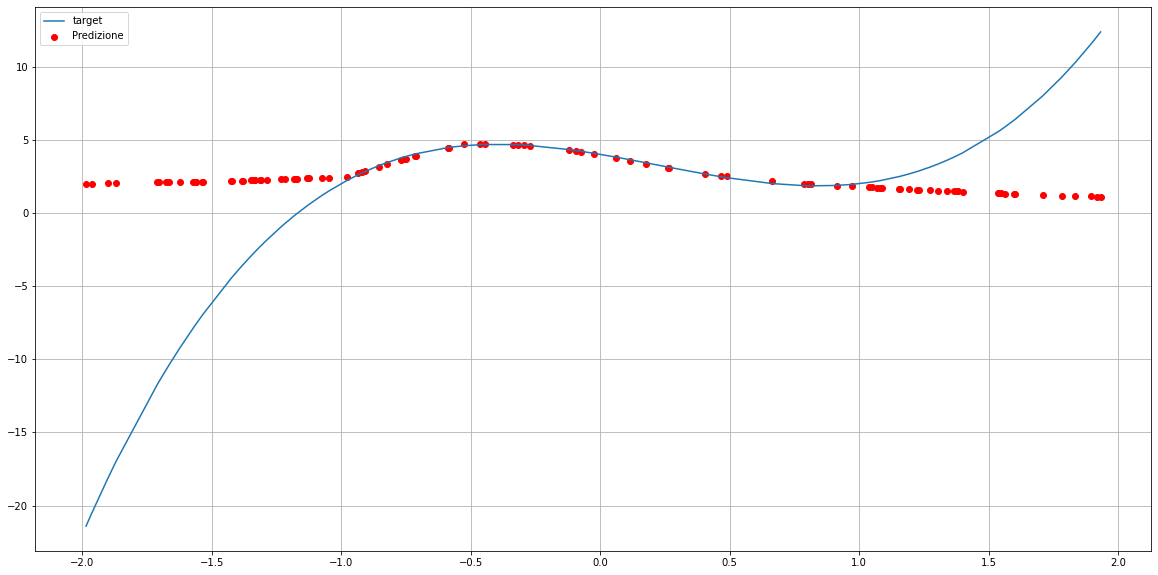

In [42]:
x_test=np.random.uniform(-2,2,100)
x_test.sort()
plt.figure(figsize=(20,10));
y_test=model2.predict(x_test)
y_target_test=a - b*x_test - c*x_test*x_test + d*x_test**3

plt.scatter(x_test,y_test ,color='r', label="Predizione")
plt.plot(x_test, y_target_test, label='target')
#plt.plot(x_valid_rev, y_target_valid, label="True")
plt.legend()
plt.grid(True)
plt.show()



Lontano dalla zona di training la funzione fitta in maniera non ottimale i dati.